In [1]:
# Applied Data Science Assignment 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

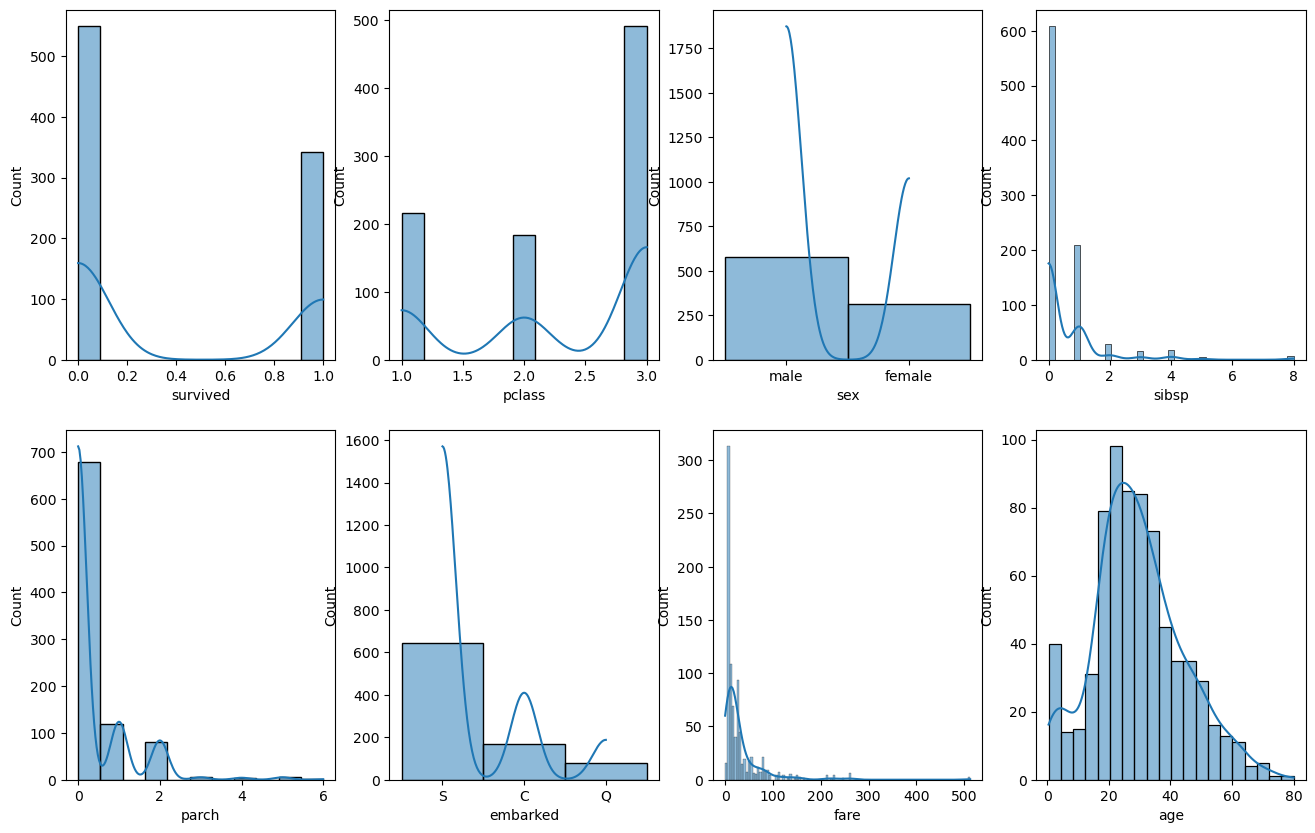

In [2]:
# Univariate Analysis

fig1, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.histplot(df['survived'], kde = True, ax = axes[0,0])
sns.histplot(df['pclass'], kde = True, ax = axes[0,1])
sns.histplot(df['sex'], kde = True, ax = axes[0,2])
sns.histplot(df['sibsp'], kde = True, ax = axes[0,3])
sns.histplot(df['parch'], kde = True, ax = axes[1,0])
sns.histplot(df['embarked'], kde = True, ax = axes[1,1])
sns.histplot(df['fare'], kde = True, ax = axes[1,2])
sns.histplot(df['age'].dropna(), kde = True, ax = axes[1,3])

<Axes: xlabel='survived', ylabel='fare'>

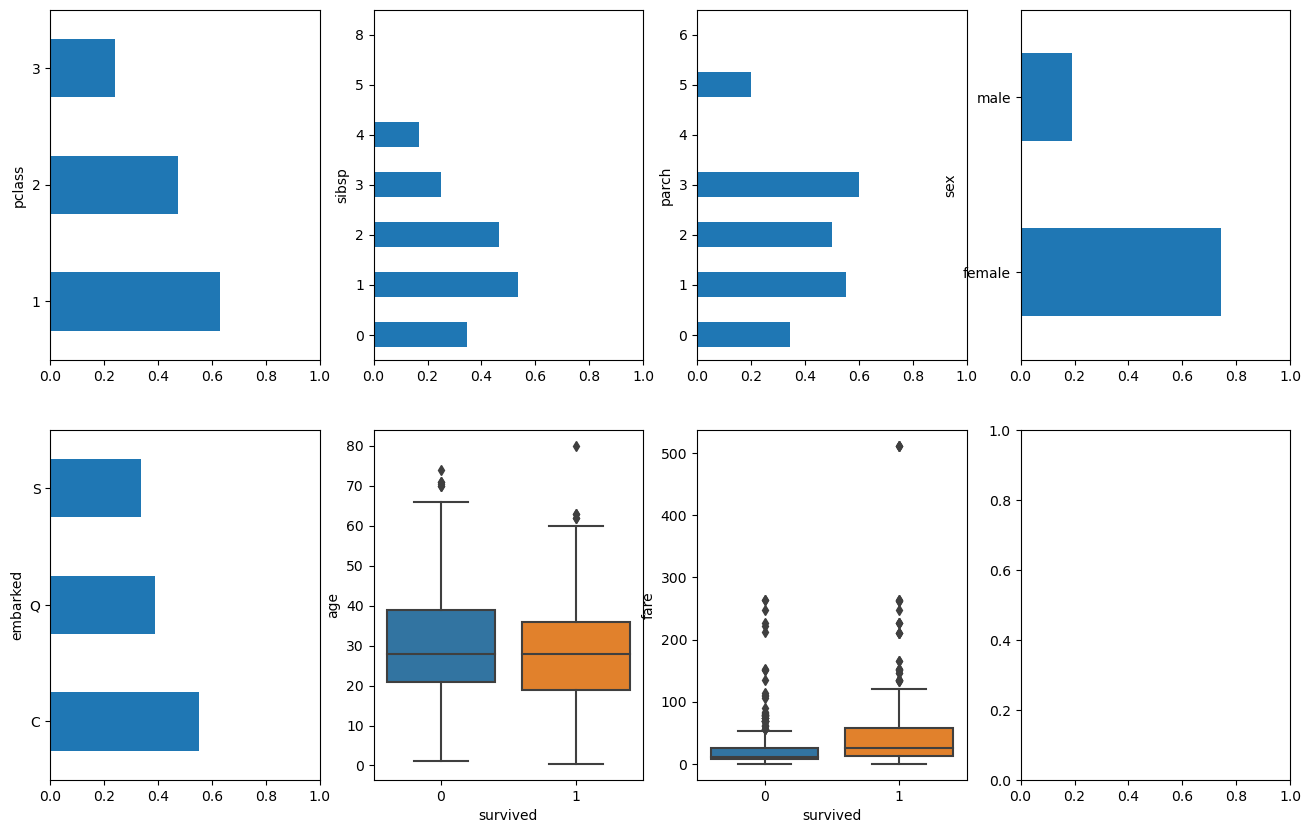

In [3]:
# Bivariate Analysis

fig2, axes2 = plt.subplots(2, 4, figsize=(16, 10))
df.groupby('pclass')['survived'].mean().plot(kind='barh',ax=axes2[0,0],xlim=[0,1])
df.groupby('sibsp')['survived'].mean().plot(kind='barh',ax=axes2[0,1],xlim=[0,1])
df.groupby('parch')['survived'].mean().plot(kind='barh',ax=axes2[0,2],xlim=[0,1])
df.groupby('sex')['survived'].mean().plot(kind='barh',ax=axes2[0,3],xlim=[0,1])
df.groupby('embarked')['survived'].mean().plot(kind='barh',ax=axes2[1,0],xlim=[0,1])
sns.boxplot(x="survived", y="age", data=df, ax=axes2[1,1])
sns.boxplot(x="survived", y="fare", data=df, ax=axes2[1,2])

C:\Users\prani\AppData\Local\Temp\ipykernel_13680\2746461367.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

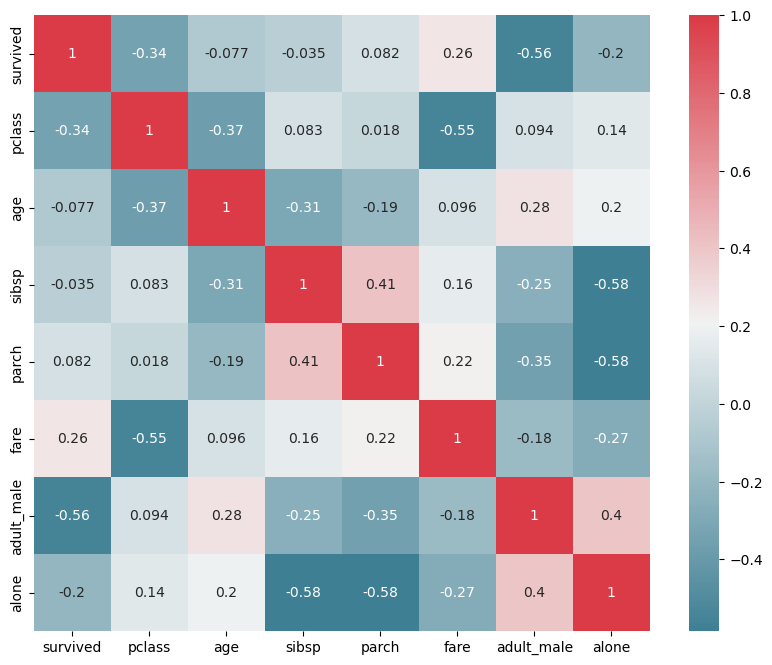

In [6]:
# Multivariate Analysis

fig3, axes3 = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,
           mask = np.zeros_like(corr, dtype=bool),
           cmap = sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=axes3, annot=True)

In [7]:
# Descriptive Statistics

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Handling missing values

df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
age_mean       False
age_median     False
dtype: bool

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

In [30]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

In [36]:
df1 = df.drop(['deck'], axis=1)
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
age_mean       0
age_median     0
dtype: int64

In [37]:
# Outlier treatment

q1=df1['fare'].quantile(0.25)
q3=df1['fare'].quantile(0.75)
iqr=q3 - q1
whisker=1.5
fare_out=df1[(df1['fare']<q1-whisker*iqr) | (df1['fare']>q3+whisker*iqr)]
fare_out.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean,age_median
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.000000,38.0
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,Southampton,no,False,19.000000,19.0
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False,29.699118,28.0
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,Cherbourg,no,False,28.000000,28.0
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False,49.000000,49.0


Previous shape with outlier:  (891, 16)
22.0 35.0
13.0
2.5 54.5
Shape after outlier treatment:  (891, 16)


<Figure size 640x480 with 0 Axes>

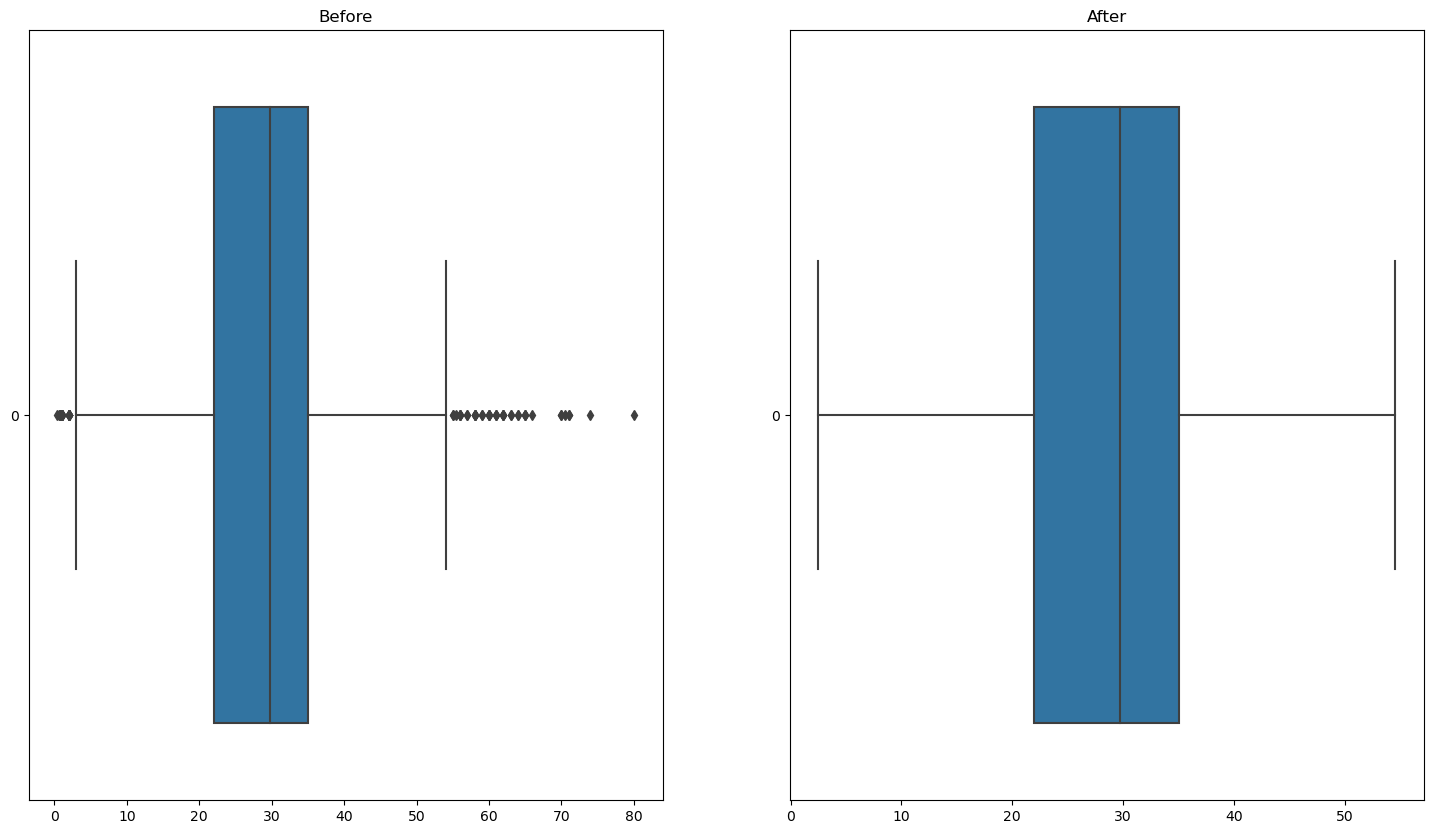

In [38]:
import warnings
warnings.filterwarnings("ignore")
plt.tight_layout()

fig4, axes4 = plt.subplots(1, 2, figsize = (18, 10))
print("Previous shape with outlier: ", df1.shape)
sns.boxplot(df1['age'],orient='h',ax=axes4[0])
axes4[0].title.set_text("Before")

q1=df1.age.quantile(0.25)
q3=df1.age.quantile(0.75)
print(q1, q3)
iqr=q3 - q1
print(iqr)
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim, u_lim)
df2=df1

# Replace outliers with max quantile value

df2['age']=np.where(df2['age']>u_lim, u_lim, df2['age'])
df2['age']=np.where(df2['age']<l_lim, l_lim, df2['age'])

print("Shape after outlier treatment: ", df2.shape)
sns.boxplot(df2['age'], orient='h', ax=axes4[1])
axes4[1].title.set_text("After")

plt.show()

In [44]:
# Checking categorical data and encoding them

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.sex = le.fit_transform(df1.sex)
df1.alive = le.fit_transform(df1.alive)
df1.alone = le.fit_transform(df1.alone)
df1.adult_male = le.fit_transform(df1.adult_male)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean,age_median
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,Southampton,0,0,22.0,22.0
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,1,0,38.0,38.0
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,Southampton,1,1,26.0,26.0
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,Southampton,1,0,35.0,35.0
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,Southampton,0,1,35.0,35.0


In [45]:
df3 = pd.get_dummies(df1, columns=['embarked', 'class', 'who', 'embark_town'])
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,1,...,1,0,0,1,0,0,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,1,0,...,1,1,0,0,0,0,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [54]:
# Splitting data into dependent and independent variables

# Dependent variables
Y = df3['survived']
Y.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [55]:
# Independent variables
X = df3.drop(columns=['survived'], axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,age_mean,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,1,22.0,1,0,7.2500,1,0,0,22.0,...,1,0,0,1,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,1,0,38.0,...,0,1,0,0,0,0,1,1,0,0
2,3,0,26.0,0,0,7.9250,0,1,1,26.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,35.0,...,1,1,0,0,0,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,1,0,1,35.0,...,1,0,0,1,0,1,0,0,0,1


In [56]:
# Scaling independent variables

name = X.columns
name

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alive',
       'alone', 'age_mean', 'age_median', 'embarked_C', 'embarked_Q',
       'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [58]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X_scaled = scale.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.68269231, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.45192308, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.52305995, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.45192308, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.56730769, ..., 0.        , 1.        ,
        0.        ]])

In [59]:
X = pd.DataFrame(X_scaled, columns = name)
X

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,age_mean,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,1.0,1.0,0.375000,0.125,0.000000,0.014151,1.0,0.0,0.0,0.271174,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.682692,0.125,0.000000,0.139136,0.0,1.0,0.0,0.472229,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.451923,0.000,0.000000,0.015469,0.0,1.0,1.0,0.321438,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.625000,0.125,0.000000,0.103644,0.0,1.0,0.0,0.434531,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.625000,0.000,0.000000,0.015713,1.0,0.0,1.0,0.434531,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.471154,0.000,0.000000,0.025374,1.0,0.0,1.0,0.334004,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.317308,0.000,0.000000,0.058556,0.0,1.0,1.0,0.233476,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,1.0,0.0,0.523060,0.125,0.333333,0.045771,0.0,0.0,0.0,0.367921,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
889,0.0,1.0,0.451923,0.000,0.000000,0.058556,1.0,1.0,1.0,0.321438,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [60]:
# Splitting the data into training and testinga

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [61]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,age_mean,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
140,1.0,0.0,0.523060,0.000,0.333333,0.029758,0.0,0.0,0.0,0.367921,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
439,0.5,1.0,0.548077,0.000,0.000000,0.020495,1.0,0.0,1.0,0.384267,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
817,0.5,1.0,0.548077,0.125,0.166667,0.072227,1.0,0.0,0.0,0.384267,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
378,1.0,1.0,0.336538,0.000,0.000000,0.007832,1.0,0.0,1.0,0.246042,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
491,1.0,1.0,0.355769,0.000,0.000000,0.014151,1.0,0.0,1.0,0.258608,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,age_mean,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
495,1.0,1.0,0.523060,0.000,0.000000,0.028221,1.0,0.0,1.0,0.367921,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
648,1.0,1.0,0.523060,0.000,0.000000,0.014737,1.0,0.0,1.0,0.367921,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
278,1.0,1.0,0.086538,0.500,0.166667,0.056848,0.0,0.0,0.0,0.082684,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
31,0.0,0.0,0.523060,0.125,0.000000,0.285990,0.0,1.0,0.0,0.367921,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
255,1.0,0.0,0.509615,0.000,0.333333,0.029758,0.0,1.0,0.0,0.359135,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [63]:
Y_train

140    29.699118
439    31.000000
817    31.000000
378    20.000000
491    21.000000
         ...    
835    39.000000
192    19.000000
629    29.699118
559    36.000000
684    54.500000
Name: age, Length: 712, dtype: float64

In [64]:
Y_test

495    29.699118
648    29.699118
278     7.000000
31     29.699118
255    29.000000
         ...    
780    13.000000
837    29.699118
215    31.000000
833    23.000000
372    19.000000
Name: age, Length: 179, dtype: float64